# A Century of Top Songs

What propels a song to become a number-one top hit? Is there an ideal duration? Are today's top-hit durations longer or shorter than a century ago?

In [71]:
import pandas as pd
df = pd.read_csv('top-song-durations.csv')
df = df.convert_dtypes()
df.head(5)


,year,artist,title,duration
0,2023,Morgan Wallen,Last Night,00:02:43
1,2022,Glass Animals,Heat Waves,00:03:58
2,2021,Dua Lipa,Levitating,00:03:23
3,2020,The Weeknd,Blinding Lights,00:03:20
4,2019,Lil Nas X feat. Billy Ray Cyrus,Old Town Road,00:02:37


The 2019 top-hit is 2 minutes and 37 seconds long.

This is the shortest song among these first 5 rows. Let's see how it compares to the shortest song in the entire dataset.

In [72]:
df.query('duration == duration.min()')

,year,artist,title,duration
95,1928,Al Jolson,Sonny Boy,00:01:55


The shortest song, "Sonny Boy", was the top hit in 1928, toward the end of the Roaring 20s and just before the Great Depression. Is this a coincidence?

To gain more insights into the historical trends, let's graph the durations of these top-hit songs over time.

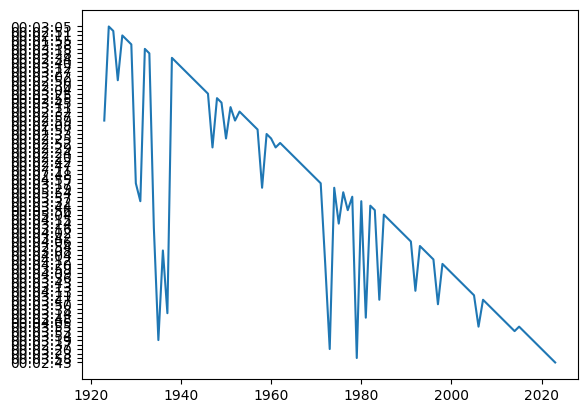

In [73]:
import matplotlib.pyplot as plt
plt.plot(df['year'], df['duration'])

Oops... It seems that the data on the y-axis is not numeric.

To get a listing of the data types for each column `info( )` method can be used.

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      101 non-null    Int64 
 1   artist    101 non-null    string
 2   title     101 non-null    string
 3   duration  101 non-null    string
dtypes: Int64(1), string(3)
memory usage: 3.4 KB


From the data type info (`Dtype`), only the year is an number. The rest of the columns, including `duration`, are all of type string.

A string data type is a way for computers to store text, such as words or other sequences of characters. Even though "00:01:55" looks numeric, it is not one of the basic number formats that python parses by default.

### Parsing the Duration

In order to graph our data, we need to convert the duration strings into numbers. As with most coding goals, there are multiple ways we could pull this off. The following is one approach.

We can first use the `str.split()` method to split each duration string (e.g. "00:01:55"). We'll split using the ":" character to get separate substrings for hours, minutes, and seconds.

In [75]:
split_duration = df['duration'].str.split(':', expand=True)
split_duration.head(5)

,0,1,2
0,00,02,43
1,00,03,58
2,00,03,23
3,00,03,20
4,00,02,37


Perfect. The duration strings got split into 3 columns (0, 1 and 2).

The first row represents a song duration that is 0 hours, 2 minutes, and 43 seconds long.

Notice that the hours and minutes have leading zeros. This is a clue that they are still strings, which makes sense the `str.split()` method creates substrings.

Let's now convert all these string values to integers using the `astype()` method.

In [76]:
split_duration = split_duration.astype('int')
split_duration.head(5)

,0,1,2
0,0,2,43
1,0,3,58
2,0,3,23
3,0,3,20
4,0,2,37


This looks like it worked since we no longer have the extra leading zeros.

### Naming the Columns
Now let's bring these new numeric columns back into our main dataframe. We also want give the columns better names than 0, 1 and 2.

We can use 'h', 'm' and 's' as short names for hours, minutes and seconds.

In [77]:
df[['h', 'm', 's']] = split_duration
df.head(5)

,year,artist,title,duration,h,m,s
0,2023,Morgan Wallen,Last Night,00:02:43,0,2,43
1,2022,Glass Animals,Heat Waves,00:03:58,0,3,58
2,2021,Dua Lipa,Levitating,00:03:23,0,3,23
3,2020,The Weeknd,Blinding Lights,00:03:20,0,3,20
4,2019,Lil Nas X feat. Billy Ray Cyrus,Old Town Road,00:02:37,0,2,37


### Calculating Total Seconds

Now that we have 'h', 'm' and 's' columns, we can use an `eval( )` to calculate the total seconds.

Since there are 3600 seconds in an hour, we can use the formula:

`total_seconds = h*3600 + m*60 + s`


In [78]:
df['total_seconds'] = df.eval('h*3600 + m*60 + s')
df.head(5)


,year,artist,title,duration,h,m,s,total_seconds
0,2023,Morgan Wallen,Last Night,00:02:43,0,2,43,163
1,2022,Glass Animals,Heat Waves,00:03:58,0,3,58,238
2,2021,Dua Lipa,Levitating,00:03:23,0,3,23,203
3,2020,The Weeknd,Blinding Lights,00:03:20,0,3,20,200
4,2019,Lil Nas X feat. Billy Ray Cyrus,Old Town Road,00:02:37,0,2,37,157


We now have a single numeric column representing song durations.

# Plotting Top-Hit Song Durations
Let's visualize how the durations of top-hit songs changed over the years.

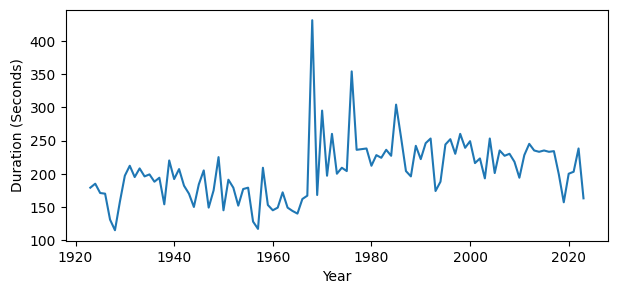

In [79]:
plt.figure(figsize=(7, 3))
plt.plot(df['year'],df['total_seconds'])
plt.xlabel('Year')
plt.ylabel('Duration (Seconds)')
plt.show()


Success! We have a visual!

Notice the sharp spike in song duration in 1968 (431 seconds). The median song duration of the number one hit song increased after this spike.

### The Longest Top Hit
What is that longest top-hit song that forms a sharp peak on the graph? It appears to be about twice as long as any top-hit song that came before it. Let's find out.

In [80]:
df.query('total_seconds == total_seconds.max()')


,year,artist,title,duration,h,m,s,total_seconds
55,1968,The Beatles,Hey Jude,00:07:11,0,7,11,431
